# Surfs UP!

The main goal in this analysis is to determine which are the best day to go on vactions in Hawaii. To do so it is studies how does rain amount and temperature changes over the time.


In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime 

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#explore contents in sql hawaii and print table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
#Using the inspector lets print the column names in each table
columns_mea =inspector.get_columns('measurement')
for col in columns_mea:
    print(col['name'], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns_sta = inspector.get_columns('station')
for col in columns_sta:
    print(col['name'], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
#Lets display the first rows for each table
sql_mea = "SELECT * FROM measurement LIMIT 5"
engine.execute(sql_mea).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
sql_sta = "SELECT * FROM station LIMIT 5"
engine.execute(sql_sta).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [11]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Station = Base.classes.station
Measurements = Base.classes.measurement

In [12]:
# We can view all of the classes that automap found
Station.classes.keys()

['measurement', 'station']

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In this sectio, first it is obtained the lasst date of observation ordering in descendant way de query. Then, since the date is given as a string it is transformed to a date time object. Once the date time object is obtained, the date of an year early is retrieved through the timedelta function. By using this two dates the Measurement data is retrieved again and the precipitation is analyzed.

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_dat_strg = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_dat_strg

('2017-08-23')

In [15]:
#Extract date  from session query
time = last_dat_strg[0]
time

'2017-08-23'

In [17]:
#transform it to a time object
last_date = datetime.datetime.strptime(time, '%Y-%m-%d').date()
last_date

datetime.date(2017, 8, 23)

In [18]:
#Lest substract a year (365 days)
from datetime import timedelta
year_ago = last_date - timedelta(365)
year_ago

datetime.date(2016, 8, 23)

In [19]:
#Convert to string
year_ago_str = year_ago.strftime('%Y-%m-%d')
year_ago_str

'2016-08-23'

In [20]:
# Perform a query to retrieve the data and precipitation scores
precipitation_q = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= year_ago_str).all()
precipitation_q[0]

('2016-08-23', 0.0)

In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_q, columns=["Date", "Precipitation"])
precipitation_df.head()


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [32]:
#Lets transform dates as an date time object
#precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format='%Y-%m-%d') 
#precipitation_df

In [33]:
precipitation_df.set_index("Date", inplace=True)
precipitation_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [34]:
# Sort the dataframe by date
precipitation_df.sort_index(inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


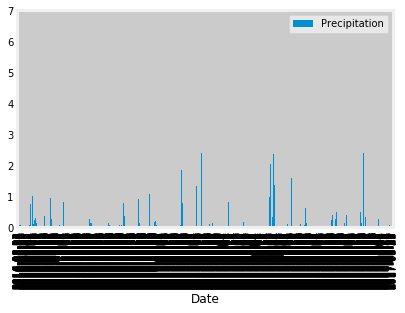

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot.bar()

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
         90., 100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
        200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
        310., 320., 330., 340., 350., 360., 370., 380., 390.]),
 <a list of 42 Text xticklabel objects>)

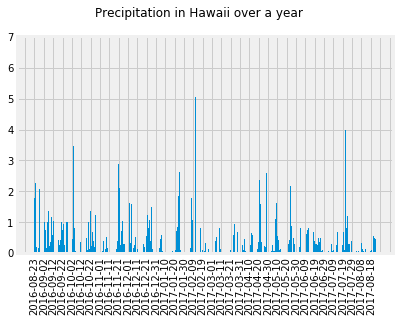

In [45]:
#This looks bad, so another approach is used
import matplotlib.ticker as ticker
fig, ax3 = plt.subplots()
ax3.bar(precipitation_df.index, precipitation_df.Precipitation, width=0.72)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
fig.suptitle("Precipitation in Hawaii over a year")
plt.xticks(rotation=90)


In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


As it can be observed, in the graph and in the  summary statistics it is observed that precipitacion in Hawaii is aroun 0.13 inches, with a few picks over the year. Therefore it seems that any date is perfect for a Vacation in Hawaii, at least from the rainy days point of view.

# Station analysis

Another important approach is to analyze the number of weather stations and the temperature in Hawaii. To do so, a querry to count the number of different stations is done. Then the number of observation for each station is counted through an if statement. The station with more observations is saved in a variable that is used to do another querry only over the station of interest. Then the temperature in the location of such an station is analyzed.

In [47]:
# Design a query to show how many stations are available in this dataset?
stations_q = session.query(Station.station, Station.name).count()

print(f"There are {stations_q} weather stations in Hawaii")

There are 9 weather stations in Hawaii


In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
measurements_cq = session.query(Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs).all()
measurements_cq

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [49]:
stations_dict = dict()
value_comp = 0
for result in measurements_cq:
    #Extract the name of the station
    name_station = result[0]
    #Make a query with a filter
    number_stations = session.query(Measurements.station).filter(Measurements.station == name_station).count()
    if number_stations > value_comp :
        station = name_station
        observations = number_stations
        value_comp = number_stations
        
print(f"The Hawaiian station with more observations is {station} with {observations} observations")

The Hawaiian station with more observations is USC00519281 with 2772 observations


In [50]:
stations_name = session.query(Station.station, Station.name).filter(Station.station == station).first()
stations_name

('USC00519281', 'WAIHEE 837.5, HI US')

In [51]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_query = session.query(func.min(Measurements.tobs).filter(Measurements.station == station).label("min_temp"), 
                            func.max(Measurements.tobs).filter(Measurements.station == station).label("max_temp"),
                            func.avg(Measurements.tobs).filter(Measurements.station == station).label("avg_temp"))


res = temp_query.one()
max_temp = res.max_temp
min_temp = res.min_temp
avg_temp = res.avg_temp

print(f"The station {station} registered a minimum temperature of {min_temp}F, a maximum temperature of {max_temp}F,")
print(f"and an average temperature of {round(avg_temp, 2)}F.")
                

The station USC00519281 registered a minimum temperature of 54.0F, a maximum temperature of 85.0F,
and an average temperature of 71.66F.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF00F25CC8>]],
      dtype=object)

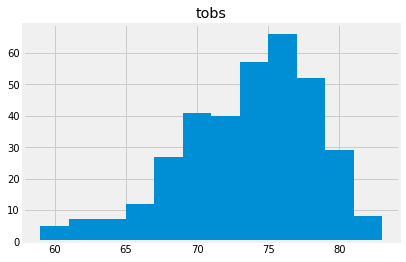

In [53]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query2 = session.query(Measurements.date, Measurements.tobs).filter(Measurements.station== station). \
                                 filter(Measurements.date > year_ago_str).all()

temp_station = pd.DataFrame(temp_query2, columns=["Date", "tobs"])

temp_station.hist(column='tobs', bins = 12)

About the temperature, it is observed in the histogram, that temperature is almost notmally distributed and in average is around the 75 °F.

# Bonus
pending...

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
